<a href="https://www.kaggle.com/code/search4/superstore-time-series?scriptVersionId=159294950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Name: Archana Yadav

> # Superstore Sales forecasting

# Problem Statement:
* To increase the Superstore sales, superstore gave us a task to understand what segments, regions, cities or customers they should be focusing on. The goal is to give practical insights to improve profit based on sales. 
* In the dynamic world of retail, forecasting sales accurately is a critical aspect of optimizing operations, managing inventory, and ensuring profitability. This project revolves around a retail dataset spanning four years from a global superstore. This will done using EDA and Regression Technique


# Objective
* To Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!


# Solution:
* Perform EDA (Data Analysis,Data Visualization, Data Cleaning) to understand the data and to clean the dataset for further process
* Perform data preprocessing
* Perform Time Series analysis and forecasting by using FB's prophet
* Model Evaluation
* Conclusion


# Dataset: 

Superstore Sales Dataset: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/

rows = 9800, columns = 18

**Dataset Columns:**
* Row ID : 'Unique Order ID for each Customer'
* Order ID: 'Unique ID for each row', 
* Order Date: 'Order Date of the product', 
* Ship Date: 'Shipping Date of the Product',
* Ship Mode: 'Shipping Mode specified by the Customer',
* Customer ID: 'Unique ID to identify each Customer',
* Customer Name: 'Name of the Customer', 
* Segment: 'The segment where the Customer belongs',
* Country: 'Country of residence of the Customer', 
* City: 'City of residence of of the Customer',
* State: 'State of residence of the Customer', 
* Postal Code: 'Postal Code of every Customer',
* Region: 'Region where the Customer belong',
* Product ID: 'Unique ID of the Product',
* Category: 'Category of the product ordered', 
* Sub-Category: 'Sub-Category of the product ordered',
* Product Name: 'Name of the Product',
* Sales: 'Sales of the Product'


### For detailed EDA and Regression:

* Please check below link:

https://www.kaggle.com/code/search4/superstore-eda-regression

# Packages

In [1]:
# !pip install prophet

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import time
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import warnings
warnings.filterwarnings("ignore")

In [3]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

# Data

In [4]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Handle missing values

* As here you can see Postal Code column having 11 missing values
* 1st we can check relation between Country,City,State with Postal Code so, if possible then to treat the missing value we can replace it appropiate/ respective values 

In [6]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

,Country,City,State,Postal Code
2234,United States,Burlington,Vermont,NaN
5274,United States,Burlington,Vermont,NaN
8798,United States,Burlington,Vermont,NaN
9146,United States,Burlington,Vermont,NaN
9147,United States,Burlington,Vermont,NaN
9148,United States,Burlington,Vermont,NaN
9386,United States,Burlington,Vermont,NaN
9387,United States,Burlington,Vermont,NaN
9388,United States,Burlington,Vermont,NaN
9389,United States,Burlington,Vermont,NaN


In [7]:
df.loc[(df['City']=='Burlington') & (df['State']=='Vermont'),['Country','Postal Code']]

,Country,Postal Code
2234,United States,NaN
5274,United States,NaN
8798,United States,NaN
9146,United States,NaN
9147,United States,NaN
9148,United States,NaN
9386,United States,NaN
9387,United States,NaN
9388,United States,NaN
9389,United States,NaN


**Observation**
* Here you can see where State is Vermount and City is Burlington we don't have any Postal Code in this dataset
* So we have two option to deal with this
    1. Remove all missing data
    2. Check Postal Code for this State and City online and place that value here
* As we know how much data are important so 1st we'll try to search Postal Code online and try to use that

**Search Result**
* You can check for postal code of burlington city in vermont for shipping & you'll get the search result as :
            **ZIP Code 05401**
* So here to deal with missing value we are going to use 05401
* Before performing any operation on the data set first you need to create a copy and then do all the operation.

In [8]:
train = df.copy()
train['Postal Code'] = train['Postal Code'].fillna(5401) # leading zeros in decimal integer literals are not permitted so we use 5401

In [9]:
train.isna().sum().sum()

0

## Drop Unwanted Features

* As you can see there is no use of Row ID, Order ID, Customer ID and Customer Name to train our model so just remove these. 

In [10]:
train.drop(['Row ID','Customer Name','Order ID','Product ID'],axis=1,inplace=True)

## Check and drop Duplicate data

In [11]:
train[train.duplicated()]

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229.0,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [12]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

## Convert Order date and ship date dtype object to datetime and Postal Code float to int

* To play with dates first need to convert these columns with datetime data type

In [13]:
train['Order Date'] = pd.to_datetime(train['Order Date'], format='%d/%m/%Y') 
train['Ship Date'] = pd.to_datetime(train['Ship Date'], format='%d/%m/%Y')  
train['Postal Code'] = train['Postal Code'].astype(int)

* Here we seperate out the month, year,dates for further analysis

In [14]:
train.insert(loc=4,  column='order_month_year',value=train['Order Date'].dt.to_period('M'))
train.insert(loc=5, column='ship_month_year', value=train['Ship Date'].dt.to_period('M'))

train.insert(loc=6, column='order_day', value=train['Order Date'].dt.day)
train.insert(loc=7, column='order_month', value=train['Order Date'].dt.month)
train.insert(loc=8, column='order_year', value=train['Order Date'].dt.year)

train.insert(loc=9, column='ship_day', value=train['Ship Date'].dt.day)
train.insert(loc=10, column='ship_month', value=train['Ship Date'].dt.month)
train.insert(loc=11, column='ship_year', value=train['Ship Date'].dt.year)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        9799 non-null   datetime64[ns]
 1   Ship Date         9799 non-null   datetime64[ns]
 2   Ship Mode         9799 non-null   object        
 3   Customer ID       9799 non-null   object        
 4   order_month_year  9799 non-null   period[M]     
 5   ship_month_year   9799 non-null   period[M]     
 6   order_day         9799 non-null   int32         
 7   order_month       9799 non-null   int32         
 8   order_year        9799 non-null   int32         
 9   ship_day          9799 non-null   int32         
 10  ship_month        9799 non-null   int32         
 11  ship_year         9799 non-null   int32         
 12  Segment           9799 non-null   object        
 13  Country           9799 non-null   object        
 14  City              9799 non-nu

In [16]:
pd.set_option('display.max_columns', None)
train.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,CG-12520,2017-11,2017-11,8,11,2017,11,11,2017,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-11-08,2017-11-11,Second Class,CG-12520,2017-11,2017-11,8,11,2017,11,11,2017,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,2017-06-12,2017-06-16,Second Class,DV-13045,2017-06,2017-06,12,6,2017,16,6,2017,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


## Handling Outliers:
* As we already see in the Data Visualization part, the Sales column having some outliers so it is important to handle this  

In [17]:
train['Sales_log'] = np.log(train['Sales'])

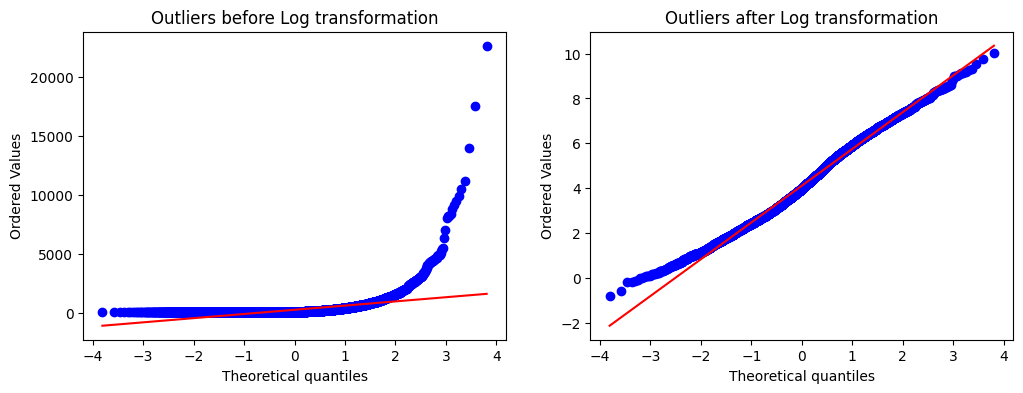

In [18]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
stats.probplot(train['Sales'], dist="norm", plot=ax1)
ax1.set_title('Outliers before Log transformation')
ax2 = fig.add_subplot(122)
stats.probplot(train['Sales_log'],dist="norm", plot=ax2)
ax2.set_title('Outliers after Log transformation')
plt.show()

## Time Series Analysis

In [19]:
regions = train['Region'].unique()
shipModes = train['Ship Mode'].unique()
categories = train['Category'].unique()

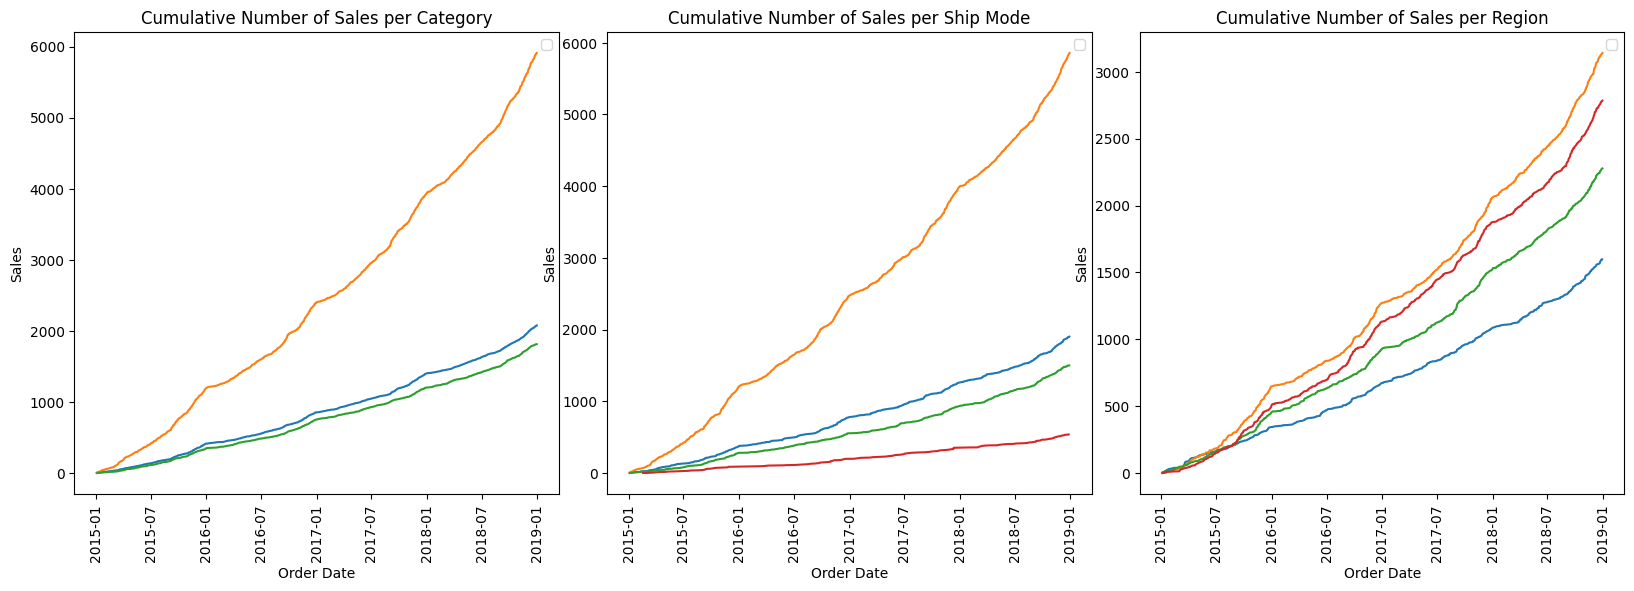

In [20]:
plt.figure(5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1);
#graphing 'Sales' vs. 'Category'
dfbyCatOrderDate = train.groupby(['Category','Order Date'])
plt.subplot(131).title.set_text('Cumulative Number of Sales per Category')
plt.xticks(rotation=90) 
plt.legend()
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))

#graphing 'Sales' vs. 'Ship Mode'
dfbyShipOrderDate = train.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Ship Mode')
plt.xticks(rotation=90)
plt.legend()
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))
    
#graphing 'Sales' vs. 'Region'
dfbyRegionOrderDate = train.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per Region')
plt.xticks(rotation=90)
plt.legend()
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))

In [21]:
# define the model
train_df = train[['Ship Date','Sales']]
train_df = train_df.rename(columns={'Ship Date':'ds','Sales':'y'})
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=7)
future.tail(7)

09:03:19 - cmdstanpy - INFO - Chain [1] start processing
09:03:20 - cmdstanpy - INFO - Chain [1] done processing


,ds
1326,2019-01-06
1327,2019-01-07
1328,2019-01-08
1329,2019-01-09
1330,2019-01-10
1331,2019-01-11
1332,2019-01-12


In [22]:
forecast = m.predict(future)    
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1323,2019-01-03,220.439443,-552.244282,1027.249975
1324,2019-01-04,194.436341,-667.472347,1061.488506
1325,2019-01-05,230.858515,-551.933272,1078.868037
1326,2019-01-06,249.746479,-593.194953,1065.254290
1327,2019-01-07,272.188542,-507.822649,1180.634962
1328,2019-01-08,190.993552,-616.389885,979.766869
1329,2019-01-09,210.344542,-576.129821,1002.679491
1330,2019-01-10,211.430216,-551.081655,1067.330735
1331,2019-01-11,186.269456,-683.518269,943.037869
1332,2019-01-12,223.924778,-517.034049,1101.927247


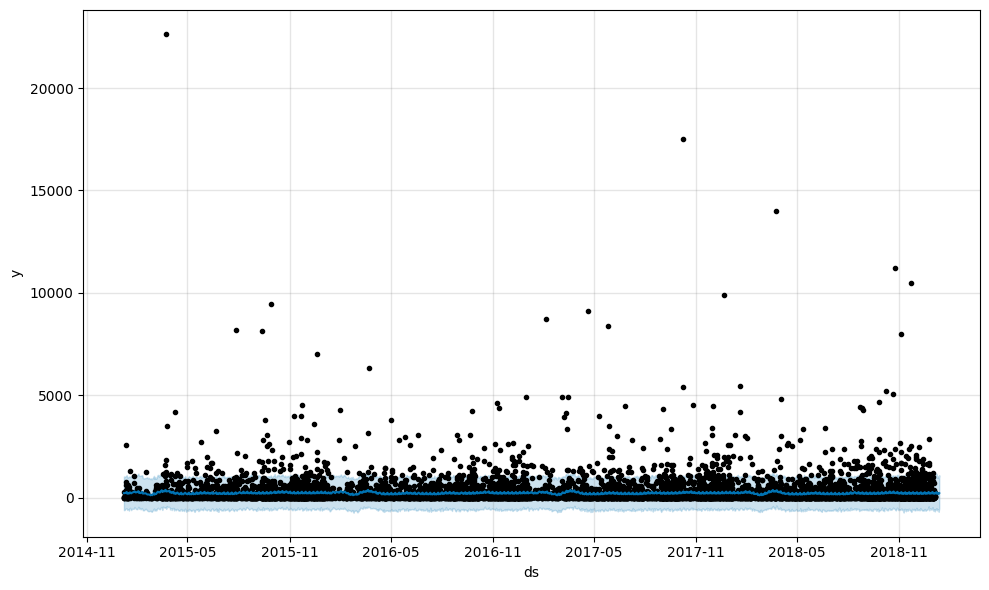

In [23]:
fig1 = m.plot(forecast)

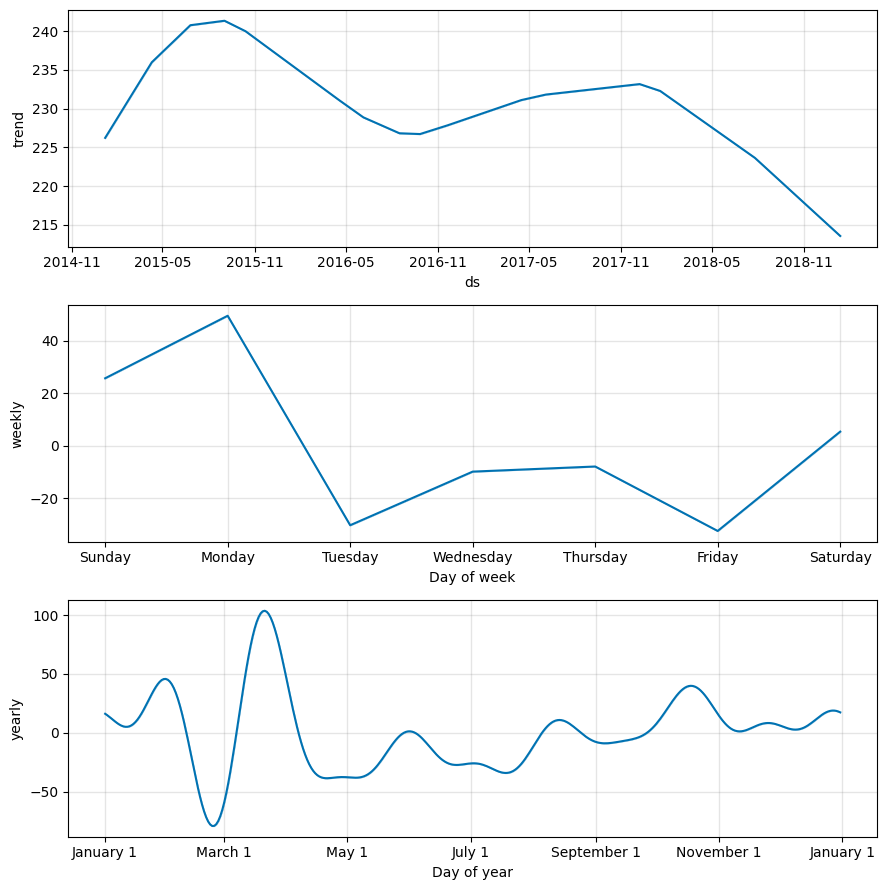

In [24]:
fig2 = m.plot_components(forecast)

In [25]:
plot_plotly(m, forecast)

In [26]:
plot_components_plotly(m, forecast)

In [27]:
train.drop(['Customer ID','Country','City','State'],axis=1,inplace=True)

In [28]:
pd.set_option('display.max_columns',None)
train.sample()

,Order Date,Ship Date,Ship Mode,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Sales_log
609,2015-05-23,2015-05-27,Standard Class,2015-05,2015-05,23,5,2015,27,5,2015,Consumer,19134,East,Technology,Phones,Motorola L804,55.188,4.010746
